## Business Understanding

Task 2: Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
data = pd.read_excel(r"C:\Users\seyi\Downloads\ANZ synthesised transaction dataset.xlsx")

In [3]:
data.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [4]:
data_salaries = data[data['txn_description']=='PAY/SALARY'].groupby('customer_id').mean()

In [5]:
data_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [6]:
salaries = []
for customer_id in data['customer_id']:
    salaries.append(int(data_salaries.loc[customer_id]['amount']))
    
data['annual_salary'] = salaries

In [7]:
data_cust = data.groupby("customer_id").mean()
data_cust.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


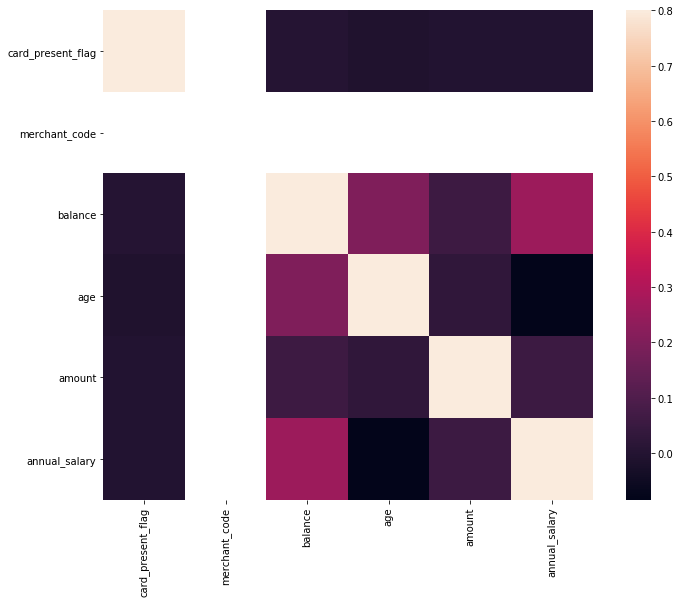

In [10]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

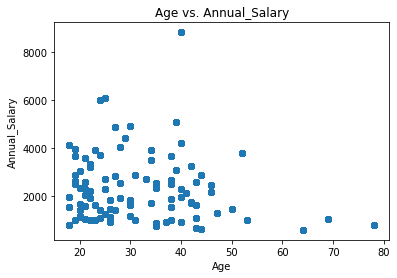

In [29]:
import matplotlib.pyplot as plt

age_cust = data['age']
salary = data['annual_salary']

plt.scatter(age_in, salary)
plt.title('Age vs. Annual_Salary')
plt.xlabel('Age')
plt.ylabel('Annual_Salary')
plt.show()

## Predictive Analysis

#### Building a simple regression model:

In [11]:
N_train = int(len(data_cust)*0.8)
X_train = data_cust.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = data_cust["annual_salary"].iloc[:N_train]
X_test = data_cust.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = data_cust["annual_salary"].iloc[N_train:]

In [12]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)
lin_reg.score(X_train, Y_train)

0.23295376366257825

In [13]:
lin_reg.predict(X_test)

array([1993.98473311, 2867.39066481, 1944.95959591, 1806.85984885,
       2226.35045442, 2075.34697175, 1813.02987337, 5388.67435983,
       1902.35351608, 2191.90445145, 1713.48134178, 2854.40519949,
       2094.77781158, 3815.34342881, 2249.92922822, 1768.80816189,
       2095.02988288, 1515.18425875, 1782.72752537, 2481.2898546 ])

In [14]:
lin_reg.score(X_test, Y_test)

-0.31694234980747327

#### The challenge: Building a decision-tree based model

In [15]:
data_cat = data[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [16]:
pd.get_dummies(data_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [17]:
N_train = int(len(data)*0.8)
X_train = pd.get_dummies(data_cat).iloc[:N_train]
Y_train = data["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(data_cat).iloc[N_train:]
Y_test = data["annual_salary"].iloc[N_train:]

#### For Classification (Using the DecisionTreeClassifier)

In [18]:
decision_tree_class = DecisionTreeClassifier()

In [19]:
decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train)

0.7882499481004774

In [20]:
decision_tree_class.predict(X_test)

array([1013, 1043, 4132, ..., 4054, 1043,  996], dtype=int64)

In [21]:
decision_tree_class.score(X_test, Y_test)

0.755500207555002

#### For Regression (Using the DecisionTreeRegressor)

In [22]:
decision_tree_reg = DecisionTreeRegressor()

In [23]:
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)

0.7468978726536879

In [24]:
decision_tree_reg.predict(X_test)

array([1226.42857143, 1043.        , 4132.        , ..., 3345.04761905,
       1043.        , 1626.        ])

In [25]:
decision_tree_reg.score(X_test, Y_test)

0.6821466990827783